![Alt text](imgs/image-2.png)

In [11]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as st

cols = ['s_length', 's_width', 'p_length', 'p_width', 'clas']
df = pd.read_csv('datasets/iris.txt', sep=',', header=None, names=cols)

df.head()


,s_length,s_width,p_length,p_width,clas
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [12]:
df.clas.value_counts()

clas
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
df1 = df.loc[(df['clas'] == 'Iris-setosa')]
df2 = df.loc[(df['clas'] == 'Iris-versicolor')]
df3 = df.loc[(df['clas'] == 'Iris-virginica')]

dfs = [df1['p_length'], df2['p_length'], df3['p_length'], df1['p_length'], df2['p_length'], df3['p_length']]
titles_p = ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica', '', '', '']

### Проверка гипотезы о нормальом распределении длины цветков по типу ириса

#### Графики

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


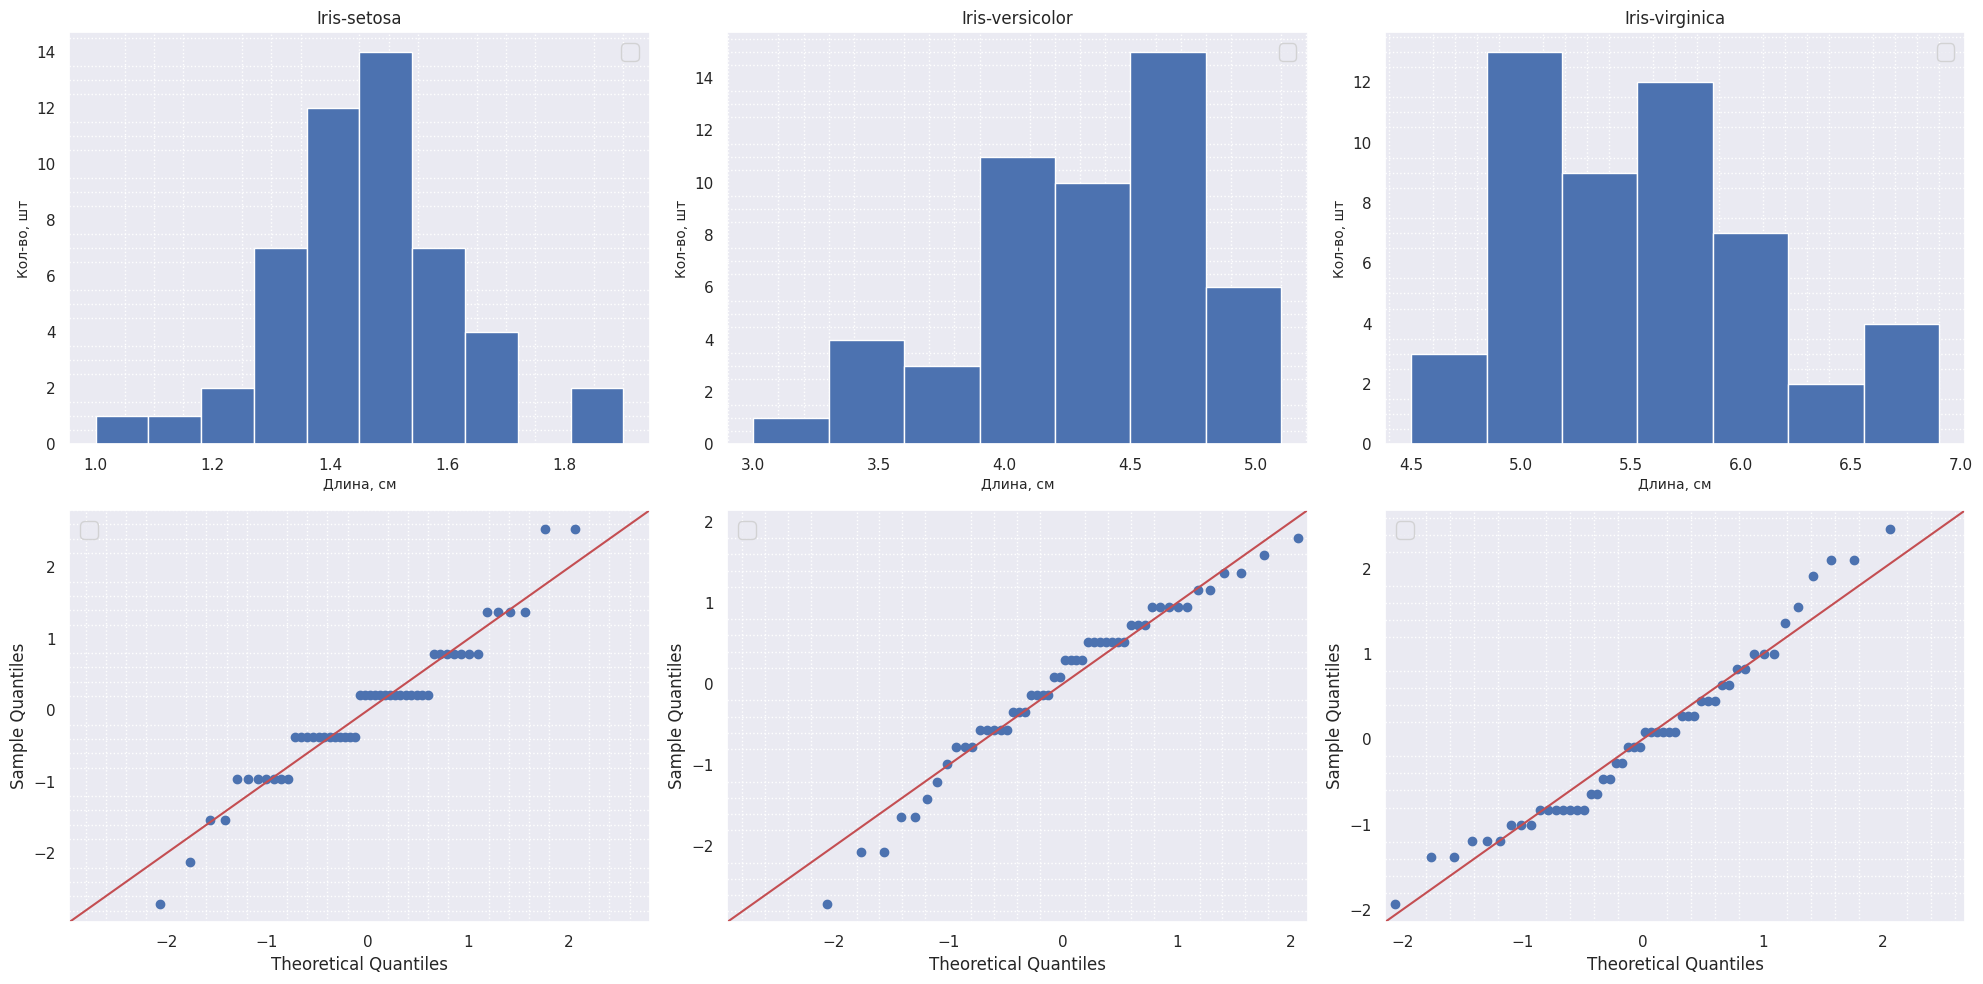

In [14]:
def pl(c, ax):
    ax.hist(x=dfs[c], bins='auto');
    ax.set_xlabel(r'Длина, см', fontsize=10)
    ax.set_ylabel(r'Кол-во, шт', fontsize=10)
    ax.set_title(titles_p[c])

def pl2(ax, c):
    sm.qqplot(st.zscore(dfs[c]), line='45', ax=ax)
    ax.set_title(titles_p[c])

fig, axes = plt.subplots(ncols=3, nrows=2, figsize=(20, 10))
c = 0

for idx, row in enumerate(axes):
    for jdx, ax in enumerate(row):
        if c < 3:
            pl(c, ax)
        else:
            pl2(ax, c)
        c+=1
        
        ax.minorticks_on()
        ax.legend(fontsize=16)
        ax.grid(which='major')
        ax.grid(which='minor', linestyle=':')

fig.tight_layout()
plt.show()

#####  Критерий Колмогорова
![Alt text](imgs/image-3.png)

In [15]:
print("setosa    ", sm.stats.diagnostic.lilliefors(df1['p_length'], dist='norm', pvalmethod='table'))
print("versicolor", sm.stats.diagnostic.lilliefors(df2['p_length'], dist='norm', pvalmethod='table'))
print("virginica ", sm.stats.diagnostic.lilliefors(df3['p_length'], dist='norm', pvalmethod='table'))

setosa     (0.15781771984946413, 0.0032607565435438966)
versicolor (0.11712123583515, 0.08376628261737941)
virginica  (0.11360588567240326, 0.10684689258669411)


#### Критерий Андерсона-Дарлина
![Alt text](imgs/image-4.png)

In [16]:
print("setosa    ", sm.stats.diagnostic.normal_ad(df1['p_length']))
print("versicolor", sm.stats.diagnostic.normal_ad(df2['p_length']))
print("virginica ", sm.stats.diagnostic.normal_ad(df3['p_length']))

setosa     (1.0111267565772053, 0.010556853362454066)
versicolor (0.555056009009121, 0.14457796165541414)
virginica  (0.6089560615441201, 0.10742218942114325)


#### Критерий Крамера-фон-Мизеса
![Alt text](imgs/image-5.png)

In [17]:
print("setosa    ", st.kstest(df1['p_length'], st.norm.cdf))
print("versicolor", st.kstest(df2['p_length'], st.norm.cdf))
print("virginica ", st.kstest(df3['p_length'], st.norm.cdf))

setosa     KstestResult(statistic=0.8449303297782917, pvalue=8.986498175214717e-41, statistic_location=1.2, statistic_sign=-1)
versicolor KstestResult(statistic=0.9986501019683699, pvalue=6.547540586674824e-144, statistic_location=3.0, statistic_sign=-1)
virginica  KstestResult(statistic=0.9999966023268753, pvalue=7.246190448605723e-274, statistic_location=4.5, statistic_sign=-1)


#### Критерий Шапиро-Уилка
![Alt text](imgs/image-7.png)

In [18]:
print("setosa    ", st.shapiro(df1['p_length']))
print("versicolor", st.shapiro(df2['p_length']))
print("virginica ", st.shapiro(df3['p_length']))

setosa     ShapiroResult(statistic=0.9549456834793091, pvalue=0.054648224264383316)
versicolor ShapiroResult(statistic=0.9660043120384216, pvalue=0.1584763377904892)
virginica  ShapiroResult(statistic=0.9621864557266235, pvalue=0.10977503657341003)


#### Критерий Харке–Бера
![Alt text](imgs/image-8.png)

In [19]:
print("setosa    ", st.jarque_bera(df1['p_length']))
print("versicolor", st.jarque_bera(df2['p_length']))
print("virginica ", st.jarque_bera(df3['p_length']))

setosa     SignificanceResult(statistic=1.419724152308296, pvalue=0.49171201159595546)
versicolor SignificanceResult(statistic=2.8942877840783607, pvalue=0.23524120380877678)
virginica  SignificanceResult(statistic=2.502864444448169, pvalue=0.2860947520305715)


### Доверительные интервалы для парметров нормального распределения

Существует вероятность 95%, что доверительный интервал содержит истинный средний размер цветка

In [20]:
print("setosa    ", st.norm.interval(0.95, loc=np.mean(df1['p_length']), scale=st.sem(df1['p_length'])))
print("versicolor", st.norm.interval(0.95, loc=np.mean(df2['p_length']), scale=st.sem(df2['p_length'])))
print("virginica ", st.norm.interval(0.95, loc=np.mean(df3['p_length']), scale=st.sem(df3['p_length'])))

setosa     (1.4159060441139366, 1.5120939558860633)
versicolor (4.12974971590785, 4.39025028409215)
virginica  (5.399025406128198, 5.704974593871803)
